# How are in-demand skills trending for Data Analysts?

In [94]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Cleaning Data
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [95]:
df_DA_RO = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Romania')].copy()

df_DA_RO.sample(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
106572,Data Analyst,Business Data Analyst,"Cluj-Napoca, Romania",via Lucrezi.ro,Full-time,False,Romania,2023-09-28 00:20:28,True,False,Romania,None,NaN,NaN,DataArt,"[sql, java, python]","{'programming': ['sql', 'java', 'python']}"
90293,Data Analyst,Data Analyst,"Bucharest, Romania",via Hipo,Full-time,False,Romania,2023-02-12 00:29:37,True,False,Romania,None,NaN,NaN,Teamland,None,None
590774,Data Analyst,Data Analyst,"Bucharest, Romania",via SmartRecruiters Job Search,Full-time,False,Romania,2023-02-07 09:27:13,True,False,Romania,None,NaN,NaN,Talentocrat,"[sql, r, python, tableau, power bi]","{'analyst_tools': ['tableau', 'power bi'], 'pr..."
662670,Data Analyst,European Data Analyst,"Bucharest, Romania",via Kellogg's,Full-time,False,Romania,2023-02-20 10:23:07,False,False,Romania,None,NaN,NaN,Kellogg Company,[sap],{'analyst_tools': ['sap']}
519208,Data Analyst,Data Analyst,"Bucharest, Romania",via EJobs,Full-time,False,Romania,2023-01-09 11:32:55,True,False,Romania,None,NaN,NaN,Eurostyle Systems Ec S.R.L.,"[vba, excel, sap]","{'analyst_tools': ['excel', 'sap'], 'programmi..."


In [96]:
df_DA_RO['job_posted_month_no'] = df_DA_RO['job_posted_date'].dt.month

In [97]:
df_DA_RO_explode = df_DA_RO.explode('job_skills')

In [98]:
df_DA_RO_pivot = df_DA_RO_explode.pivot_table(
    index = 'job_posted_month_no',
    columns='job_skills',
    aggfunc = 'size',
    fill_value=0
)

In [99]:
df_DA_RO_pivot.loc['Total'] = df_DA_RO_pivot.sum()
df_DA_RO_pivot

job_skills,airflow,alteryx,ansible,asp.net,assembly,aws,azure,bash,bigquery,bitbucket,...,tidyverse,unix,vba,visio,visual basic,vue,webex,windows,wire,word
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,0,5,0,0,0,3,4,0,3,0,...,0,1,16,0,0,1,1,0,0,9
2,0,1,0,0,0,2,9,0,2,2,...,0,1,4,2,0,0,0,2,0,7
3,0,1,1,0,0,2,6,0,1,0,...,0,0,1,1,0,0,0,0,0,6
4,0,1,0,0,1,8,7,0,0,0,...,0,1,2,1,0,0,0,0,0,9
5,1,1,0,0,0,4,12,1,3,0,...,2,0,2,0,0,0,0,1,1,7
6,0,4,0,0,0,2,5,1,0,0,...,1,0,9,0,1,0,0,0,1,9
7,0,1,0,0,0,3,1,1,0,0,...,0,1,4,0,1,1,0,4,0,4
8,0,0,0,1,0,3,1,0,1,0,...,0,1,4,0,0,0,0,1,0,3
9,2,0,0,0,1,3,6,1,2,0,...,0,0,3,0,0,0,0,0,0,2


In [100]:
df_DA_RO_pivot.loc['Total'].sort_values(ascending=False)

job_skills
excel         400
sql           374
power bi      206
python        191
tableau       149
             ... 
redhat          1
macos           1
npm             1
postgresql      1
asp.net         1
Name: Total, Length: 117, dtype: int64

In [101]:
df_DA_RO_pivot = df_DA_RO_pivot[df_DA_RO_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_RO_pivot = df_DA_RO_pivot.drop('Total')
df_DA_RO_pivot

job_skills,excel,sql,power bi,python,tableau,sap,powerpoint,r,word,sas,...,ansible,slack,terraform,dplyr,svn,redhat,macos,npm,postgresql,asp.net
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,53,59,33,29,21,16,12,15,9,6,...,0,1,0,0,0,0,0,0,1,0
2,40,49,26,23,24,16,8,14,7,16,...,0,0,0,0,0,0,0,0,0,0
3,40,35,22,22,18,14,8,16,6,8,...,1,0,1,0,0,0,0,0,0,0
4,38,31,15,17,13,12,13,9,9,4,...,0,0,0,0,0,0,1,0,0,0
5,33,30,19,13,7,8,10,6,7,2,...,0,0,0,1,0,0,0,0,0,0
6,35,30,17,8,6,11,5,3,9,8,...,0,0,0,0,1,0,0,0,0,0
7,34,31,11,14,11,7,10,6,4,6,...,0,0,0,0,0,0,0,1,0,0
8,22,24,10,16,5,11,2,7,3,0,...,0,0,0,0,0,0,0,0,0,1
9,26,29,17,15,9,12,6,2,2,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='job_posted_month_no'>

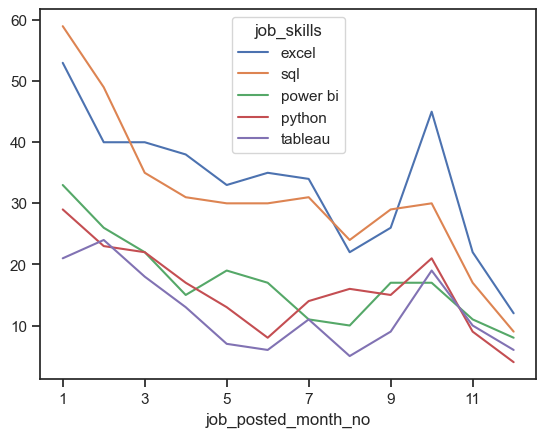

In [102]:
df_DA_RO_pivot.iloc[:,:5].plot(kind='line')

In [103]:
DA_totals = df_DA_RO.groupby('job_posted_month_no').size()
DA_totals

job_posted_month_no
1     122
2      92
3     100
4      84
5      69
6      78
7      74
8      61
9      67
10     81
11     50
12     29
dtype: int64

In [104]:
df_DA_RO_percent = df_DA_RO_pivot.div(DA_totals/100,axis=0)
df_DA_RO_percent

job_skills,excel,sql,power bi,python,tableau,sap,powerpoint,r,word,sas,...,ansible,slack,terraform,dplyr,svn,redhat,macos,npm,postgresql,asp.net
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,43.442623,48.360656,27.049180,23.770492,17.213115,13.114754,9.836066,12.295082,7.377049,4.918033,...,0.0,0.819672,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.819672,0.000000
2,43.478261,53.260870,28.260870,25.000000,26.086957,17.391304,8.695652,15.217391,7.608696,17.391304,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,40.000000,35.000000,22.000000,22.000000,18.000000,14.000000,8.000000,16.000000,6.000000,8.000000,...,1.0,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,45.238095,36.904762,17.857143,20.238095,15.476190,14.285714,15.476190,10.714286,10.714286,4.761905,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.190476,0.000000,0.000000,0.000000
5,47.826087,43.478261,27.536232,18.840580,10.144928,11.594203,14.492754,8.695652,10.144928,2.898551,...,0.0,0.000000,0.0,1.449275,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
6,44.871795,38.461538,21.794872,10.256410,7.692308,14.102564,6.410256,3.846154,11.538462,10.256410,...,0.0,0.000000,0.0,0.000000,1.282051,0.0,0.000000,0.000000,0.000000,0.000000
7,45.945946,41.891892,14.864865,18.918919,14.864865,9.459459,13.513514,8.108108,5.405405,8.108108,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.351351,0.000000,0.000000
8,36.065574,39.344262,16.393443,26.229508,8.196721,18.032787,3.278689,11.475410,4.918033,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.639344
9,38.805970,43.283582,25.373134,22.388060,13.432836,17.910448,8.955224,2.985075,2.985075,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [105]:
#change month number to month name
df_DA_RO_percent = df_DA_RO_percent.reset_index()
df_DA_RO_percent['job_posted_month'] = df_DA_RO_percent['job_posted_month_no'].apply(lambda x : pd.to_datetime(x,format='%m').strftime('%b'))
df_DA_RO_percent = df_DA_RO_percent.set_index('job_posted_month')
df_DA_RO_percent = df_DA_RO_percent.drop(columns ='job_posted_month_no')

df_DA_RO_percent

job_skills,excel,sql,power bi,python,tableau,sap,powerpoint,r,word,sas,...,ansible,slack,terraform,dplyr,svn,redhat,macos,npm,postgresql,asp.net
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,43.442623,48.360656,27.049180,23.770492,17.213115,13.114754,9.836066,12.295082,7.377049,4.918033,...,0.0,0.819672,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.819672,0.000000
Feb,43.478261,53.260870,28.260870,25.000000,26.086957,17.391304,8.695652,15.217391,7.608696,17.391304,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Mar,40.000000,35.000000,22.000000,22.000000,18.000000,14.000000,8.000000,16.000000,6.000000,8.000000,...,1.0,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Apr,45.238095,36.904762,17.857143,20.238095,15.476190,14.285714,15.476190,10.714286,10.714286,4.761905,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.190476,0.000000,0.000000,0.000000
May,47.826087,43.478261,27.536232,18.840580,10.144928,11.594203,14.492754,8.695652,10.144928,2.898551,...,0.0,0.000000,0.0,1.449275,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Jun,44.871795,38.461538,21.794872,10.256410,7.692308,14.102564,6.410256,3.846154,11.538462,10.256410,...,0.0,0.000000,0.0,0.000000,1.282051,0.0,0.000000,0.000000,0.000000,0.000000
Jul,45.945946,41.891892,14.864865,18.918919,14.864865,9.459459,13.513514,8.108108,5.405405,8.108108,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.351351,0.000000,0.000000
Aug,36.065574,39.344262,16.393443,26.229508,8.196721,18.032787,3.278689,11.475410,4.918033,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.639344
Sep,38.805970,43.283582,25.373134,22.388060,13.432836,17.910448,8.955224,2.985075,2.985075,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


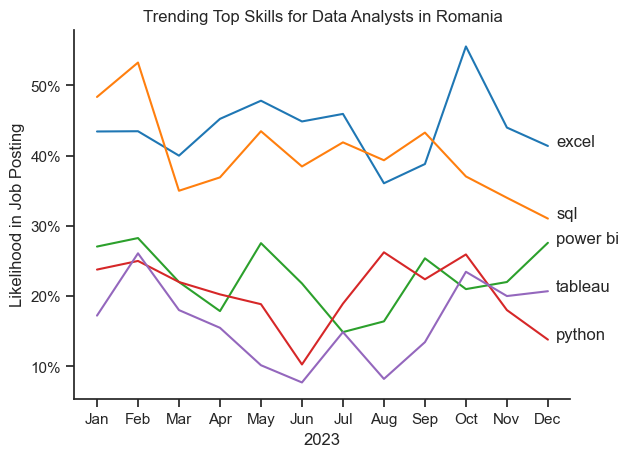

In [108]:
df_plot = df_DA_RO_percent.iloc[:,:5]

sns.lineplot(data = df_plot, dashes = False , palette ='tab10')
sns.set_theme(style='ticks')

plt.title('Trending Top Skills for Data Analysts in Romania')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter())

for i in range(5):
    plt.text(11.2,df_plot.iloc[-1,i],df_plot.columns[i])

sns.despine()